## آ )

<h1 dir = "rtl" color = "red">
<b>
نمایش SMILES:
</b>
</p>
<p dir = "rtl">
SMILES مخفف "Simplified Molecular Input Line Entry System" (سیستم ورودی خطی ساده مولکول) است و یک فرمت استاندارد برای نمایش فرمول‌های شیمیایی به صورت متنی است. این فرمت با استفاده از حروف الفبا و علائم خاص به جای نمادهای شیمیایی، اتم‌ها، پیوندها و اطلاعات دیگر را نمایش می‌دهد.
<br>
توضیحات SMILES شامل موارد زیر می‌شود:
<br>
1. اتم‌ها: هر اتم با نماد عنصر شیمیایی نمایش داده می‌شود (مثلاً C برای کربن یا O برای اکسیژن).
<br>
2. پیوندها: پیوندها با استفاده از علائم خاص مانند "-" (پیوند اصلی) یا "=" (پیوند دوگانه) نشان داده می‌شوند.
<br>
3. آرایش مکانیکی: SMILES از آرایش مکانیکی مولکول برای نشان دادن ترتیب اتم‌ها و پیوندها استفاده می‌کند.
<br>
4. اتصالات هیدروژن: هیدروژن‌ها به صورت ضمنی نمایش داده می‌شوند. به عنوان مثال، CH4 برای متان نمایش داده می‌شود.
<br>
5. اطلاعات فرعی: اطلاعات مکملی می‌توانند به SMILES افزوده شوند تا خصوصیات خاص مولکول مشخص شوند.
<br>
این فرمت به دلیل سادگی و قابلیت استفاده در محاسبات کامپیوتری و نگهداری داده‌های شیمیایی بسیار مورد استفاده قرار می‌گیرد.

</p>

In [1]:
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 26.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from rdkit.Chem import DataStructs

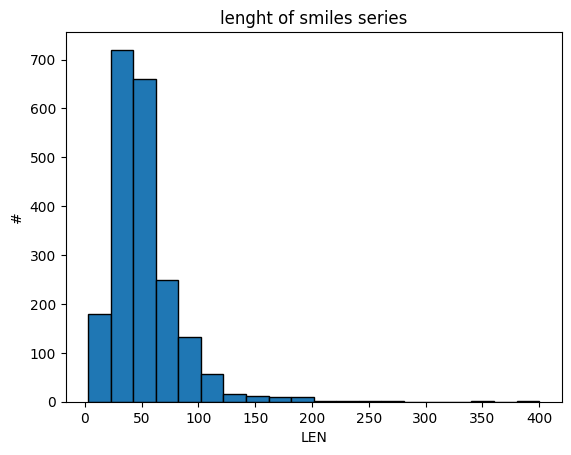

In [3]:
excel_file_path = 'BBBP.csv'

df = pd.read_csv(excel_file_path)

df['len_smiles'] = df['smiles'].apply(len)

plt.hist(df['len_smiles'], bins=20, edgecolor='black')
plt.title('lenght of smiles series')
plt.xlabel('LEN')
plt.ylabel('#')
plt.show()


<p dir = "rtl">
<b>
توزیع طول رشته های smiles:
</p>
</p>
<p dir = "rtl">
بر طبق نمودار Histogram کشیده شده از طول عمده بین 20 تا 60 توکن دارا هستند و ماکزیمم مقدار نیز 400 توکن را شامل میشود اما عمده داده ها ماکزیزم طول 120 رشته را دارند.

</p>

[15:39:23] Explicit valence for atom # 1 N, 4, is greater than permitted
[15:39:23] WARNING: not removing hydrogen atom without neighbors
[15:39:23] WARNING: not removing hydrogen atom without neighbors
[15:39:23] Explicit valence for atom # 6 N, 4, is greater than permitted
[15:39:23] WARNING: not removing hydrogen atom without neighbors
[15:39:23] WARNING: not removing hydrogen atom without neighbors
[15:39:23] WARNING: not removing hydrogen atom without neighbors
[15:39:23] WARNING: not removing hydrogen atom without neighbors
[15:39:23] WARNING: not removing hydrogen atom without neighbors
[15:39:23] WARNING: not removing hydrogen atom without neighbors
[15:39:23] WARNING: not removing hydrogen atom without neighbors
[15:39:23] WARNING: not removing hydrogen atom without neighbors
[15:39:23] WARNING: not removing hydrogen atom without neighbors
[15:39:23] WARNING: not removing hydrogen atom without neighbors
[15:39:23] WARNING: not removing hydrogen atom without neighbors
[15:39:23

فرکانس رخداد توکن‌ها: Counter({'C': 36596, 'O': 6254, 'N': 4391, 'Cl': 618, 'S': 570, 'F': 509, 'Br': 50, 'H': 40, 'Na': 21, 'P': 11, 'I': 6, 'Ca': 1, 'B': 1})


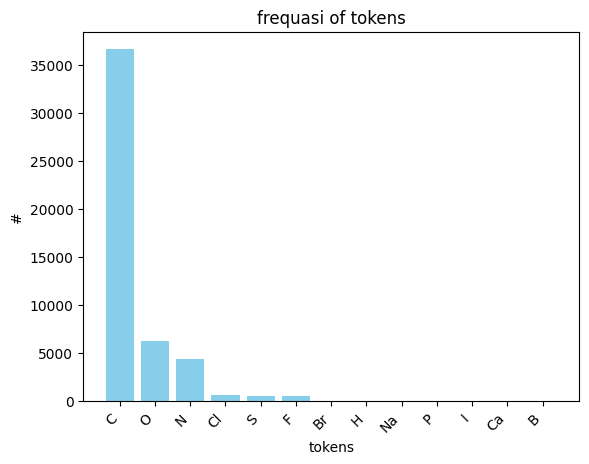

In [4]:
def analyze_smiles(smiles_list):
    molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list if Chem.MolFromSmiles(smiles) is not None]
    tokens = [atom.GetSymbol() for mol in molecules for atom in mol.GetAtoms()]
    token_frequency = Counter(tokens)

    return tokens, token_frequency

smiles_list = df['smiles'].tolist()
tokens, token_frequency = analyze_smiles(smiles_list)

print("فرکانس رخداد توکن‌ها:", token_frequency)

sorted_tokens = sorted(token_frequency.items(), key=lambda x: x[1], reverse=True)
tokens, frequencies = zip(*sorted_tokens)

plt.bar(tokens, frequencies, color='skyblue')
plt.xlabel('tokens')
plt.ylabel('#')
plt.title('frequasi of tokens')
plt.xticks(rotation=45, ha='right')
plt.show()


## ب )

In [5]:
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
max_smiles_length = 120

tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(tokens)

num_tokens = len(tokenizer.word_index) + 1

sequences = tokenizer.texts_to_sequences(df['smiles'])

padded_sequences = pad_sequences(sequences, maxlen=max_smiles_length, padding='post', truncating='post')

one_hot_matrix = np.zeros((len(padded_sequences), max_smiles_length, num_tokens), dtype='int8')

for i, sequence in enumerate(padded_sequences):
    for j, token_index in enumerate(sequence):
        one_hot_matrix[i, j, token_index] = 1

print("Shape of one-hot matrix:", one_hot_matrix.shape)


Shape of one-hot matrix: (2050, 120, 13)


In [ ]:
flat_one_hot = one_hot_matrix.reshape(len(padded_sequences), -1)
df_one_hot = pd.concat([df, pd.DataFrame(flat_one_hot)], axis=1)

print(df_one_hot.head())

   num                  name  p_np  \
0    1            Propanolol     1   
1    2  Terbutylchlorambucil     1   
2    3                 40730     1   
3    4                    24     1   
4    5           cloxacillin     1   

                                              smiles  len_smiles  0  1  2  3  \
0                   [Cl].CC(C)NCC(O)COc1cccc2ccccc12          32  0  1  0  0   
1           C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl          40  0  1  0  0   
2  c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...          50  0  1  0  0   
3                   C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C          32  0  1  0  0   
4  Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...          66  0  1  0  0   

   4  ...  1550  1551  1552  1553  1554  1555  1556  1557  1558  1559  
0  0  ...     0     0     0     0     0     0     0     0     0     0  
1  0  ...     0     0     0     0     0     0     0     0     0     0  
2  0  ...     0     0     0     0     0     0     0     0     0     0  
3 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(flat_one_hot, df['p_np'], test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

accuracy = model.evaluate(X_test, y_test)[1]

print("accuracy on test:", accuracy)


Epoch 1/10
41/41 [==============================] - 2s 10ms/step - loss: 0.4894 - accuracy: 0.7797 - val_loss: 0.4072 - val_accuracy: 0.8415
Epoch 2/10
41/41 [==============================] - 0s 6ms/step - loss: 0.4244 - accuracy: 0.8239 - val_loss: 0.3689 - val_accuracy: 0.8506
Epoch 3/10
41/41 [==============================] - 0s 5ms/step - loss: 0.3830 - accuracy: 0.8453 - val_loss: 0.3468 - val_accuracy: 0.8689
Epoch 4/10
41/41 [==============================] - 0s 5ms/step - loss: 0.3568 - accuracy: 0.8529 - val_loss: 0.3794 - val_accuracy: 0.8445
Epoch 5/10
41/41 [==============================] - 0s 5ms/step - loss: 0.3409 - accuracy: 0.8552 - val_loss: 0.3213 - val_accuracy: 0.8598
Epoch 6/10
41/41 [==============================] - 0s 5ms/step - loss: 0.3221 - accuracy: 0.8727 - val_loss: 0.3306 - val_accuracy: 0.8659
Epoch 7/10
41/41 [==============================] - 0s 5ms/step - loss: 0.3157 - accuracy: 0.8628 - val_loss: 0.3075 - val_accuracy: 0.8720
Epoch 8/10
41/41 [=

## ج )

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Flatten, Embedding

max_smiles_length = 120

tokenizer = Tokenizer(char_level=False)
tokenizer.fit_on_texts(tokens)

num_tokens = len(tokenizer.word_index) + 1

sequences = tokenizer.texts_to_sequences(df['smiles'])

padded_sequences = pad_sequences(sequences, maxlen=max_smiles_length, padding='post', truncating='post')

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['p_np'], test_size=0.2, random_state=42)

def create_bilstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=num_tokens, output_dim=64, input_length=max_smiles_length))
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

    return model

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
fold_accuracies = []

X = padded_sequences
y = df['p_np']
i = 1

for train_index, test_index in skf.split(X, y):
    print(f"fold number #{i} \n")
    i = i + 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = create_bilstm_model()
    class_weights = {0: 1.1, 1: 0.8}
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weights)

    accuracy = model.evaluate(X_test, y_test)[1]
    fold_accuracies.append(accuracy)

for i, accuracy in enumerate(fold_accuracies, 1):
    print(f"accuracy in fold #{i}: {accuracy}")

mean_accuracy = np.mean(fold_accuracies)
print(f"Model accuracy:  {mean_accuracy}")


fold number #1 

Epoch 1/10
52/52 [==============================] - 53s 362ms/step - loss: 0.5392 - accuracy: 0.7552 - val_loss: 0.5515 - val_accuracy: 0.7730
Epoch 2/10
52/52 [==============================] - 17s 323ms/step - loss: 0.5171 - accuracy: 0.7747 - val_loss: 0.5114 - val_accuracy: 0.7933
Epoch 3/10
52/52 [==============================] - 17s 331ms/step - loss: 0.4687 - accuracy: 0.8048 - val_loss: 0.4564 - val_accuracy: 0.8267
Epoch 4/10
52/52 [==============================] - 18s 347ms/step - loss: 0.4384 - accuracy: 0.8277 - val_loss: 0.4654 - val_accuracy: 0.8238
Epoch 5/10
52/52 [==============================] - 17s 331ms/step - loss: 0.4930 - accuracy: 0.7496 - val_loss: 0.5204 - val_accuracy: 0.7659
Epoch 6/10
52/52 [==============================] - 17s 325ms/step - loss: 0.4830 - accuracy: 0.7640 - val_loss: 0.5068 - val_accuracy: 0.7659
Epoch 7/10
52/52 [==============================] - 17s 323ms/step - loss: 0.4742 - accuracy: 0.7640 - val_loss: 0.4970 - val

## د )

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Flatten, Embedding

max_smiles_length = 120

tokenizer = Tokenizer(char_level=False)
tokenizer.fit_on_texts(tokens)

num_tokens = len(tokenizer.word_index) + 1

sequences = tokenizer.texts_to_sequences(df['smiles'])

padded_sequences = pad_sequences(sequences, maxlen=max_smiles_length, padding='post', truncating='post')

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['p_np'], test_size=0.2, random_state=42)

def create_bilstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=num_tokens, output_dim=64, input_length=max_smiles_length))
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

    return model

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
fold_accuracies = []

X = padded_sequences
y = df['p_np']
i = 1

for train_index, test_index in skf.split(X, y):
    print(f"fold number #{i} \n")
    i = i + 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = create_bilstm_model()
    class_weights = {0: 1.2, 1: 1}
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weights)

    accuracy = model.evaluate(X_test, y_test)[1]
    fold_accuracies.append(accuracy)

for i, accuracy in enumerate(fold_accuracies, 1):
    print(f"accuracy in fold #{i}: {accuracy}")

mean_accuracy = np.mean(fold_accuracies)
print(f"Model accuracy:  {mean_accuracy}")


fold number #1 

Epoch 1/10
52/52 [==============================] - 51s 778ms/step - loss: 0.5770 - accuracy: 0.7659 - val_loss: 0.4610 - val_accuracy: 0.7976
Epoch 2/10
52/52 [==============================] - 38s 731ms/step - loss: 0.5075 - accuracy: 0.7957 - val_loss: 0.4162 - val_accuracy: 0.8317
Epoch 3/10
52/52 [==============================] - 36s 699ms/step - loss: 0.4629 - accuracy: 0.8366 - val_loss: 0.4042 - val_accuracy: 0.8268
Epoch 4/10
52/52 [==============================] - 38s 733ms/step - loss: 0.4536 - accuracy: 0.8409 - val_loss: 0.4077 - val_accuracy: 0.8366
Epoch 5/10
52/52 [==============================] - 39s 756ms/step - loss: 0.4478 - accuracy: 0.8390 - val_loss: 0.4050 - val_accuracy: 0.8341
Epoch 6/10
52/52 [==============================] - 37s 711ms/step - loss: 0.4406 - accuracy: 0.8402 - val_loss: 0.3986 - val_accuracy: 0.8390
Epoch 7/10
52/52 [==============================] - 38s 717ms/step - loss: 0.4389 - accuracy: 0.8384 - val_loss: 0.3883 - val

## **و )**

<p dir="rtl">
فرمول شیمیایی یک رشته بوده که توالی ان اهمیت دارد اما توالی راست به چپ یا برعمس ان اهمیتی ندارد لذا وقتی از شبکه دو طرفه استفاده میکینمی نتایج بهتر است
</p>

## **ز )**


Training Baseline model...
Epoch 1/10
41/41 [==============================] - 1s 12ms/step - loss: 0.6295 - accuracy: 0.7569 - val_loss: 0.5907 - val_accuracy: 0.7927
Epoch 2/10
41/41 [==============================] - 0s 5ms/step - loss: 0.5102 - accuracy: 0.8034 - val_loss: 0.5288 - val_accuracy: 0.8140
Epoch 3/10
41/41 [==============================] - 0s 4ms/step - loss: 0.4811 - accuracy: 0.8171 - val_loss: 0.5278 - val_accuracy: 0.8110
Epoch 4/10
41/41 [==============================] - 0s 4ms/step - loss: 0.4636 - accuracy: 0.8255 - val_loss: 0.5354 - val_accuracy: 0.8079
Epoch 5/10
41/41 [==============================] - 0s 4ms/step - loss: 0.4523 - accuracy: 0.8247 - val_loss: 0.5203 - val_accuracy: 0.8049
Epoch 6/10
41/41 [==============================] - 0s 4ms/step - loss: 0.4409 - accuracy: 0.8285 - val_loss: 0.5071 - val_accuracy: 0.8079
Epoch 7/10
41/41 [==============================] - 0s 4ms/step - loss: 0.4367 - accuracy: 0.8285 - val_loss: 0.5113 - val_accuracy

ValueError: x and y must have same first dimension, but have shapes (13,) and (12,)

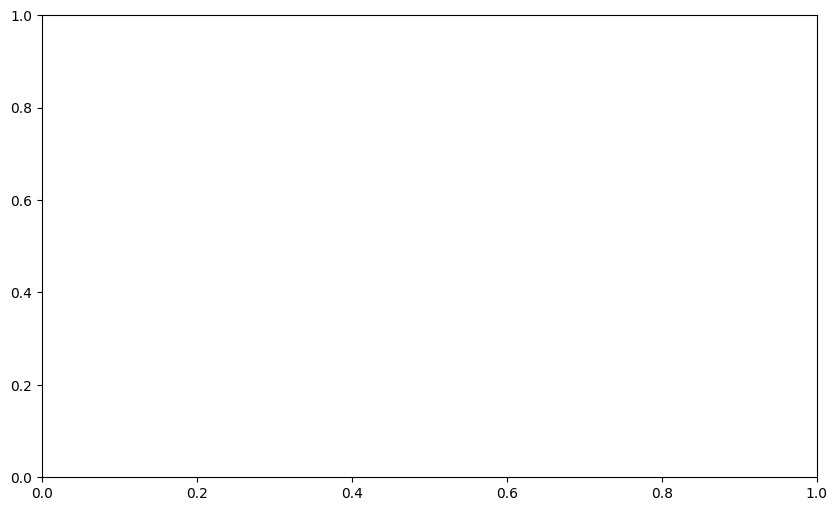

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# تعریف توکن‌ها
tokens = set("".join(df['smiles']))

# تعداد توکن‌ها
num_tokens = len(tokens) + 1  # اضافه کردن 1 برای توکن پدینگ

# تبدیل SMILES به دنباله اعداد با استفاده از توکن‌ها
tokenizer = Tokenizer(char_level=False)
tokenizer.fit_on_texts(tokens)

# تبدیل SMILES به دنباله اعداد
sequences = tokenizer.texts_to_sequences(df['smiles'])

# پر کردن دنباله‌ها به طول ثابت
max_smiles_length = 120
padded_sequences = pad_sequences(sequences, maxlen=max_smiles_length, padding='post', truncating='post')

# افراز داده‌ها بر اساس طول رشته‌ها به بین‌های 10 تایی
bins = np.arange(0, 121, 10)
df['bin'] = pd.cut(df['smiles'].apply(len), bins=bins, right=False)

# تعریف مدل‌ها
def create_baseline_model():
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=num_tokens, output_dim=64, input_length=max_smiles_length))
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(64))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_bilstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=num_tokens, output_dim=64, input_length=max_smiles_length))
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# اجرای مدل‌ها بر روی کل داده
models = {
    'Baseline': create_baseline_model(),
    'LSTM': create_lstm_model(),
    'BiLSTM': create_bilstm_model()
}

accuracies = {'Baseline': [], 'LSTM': [], 'BiLSTM': []}

for model_name, model in models.items():
    print(f"\nTraining {model_name} model...")
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    model_accuracies = []

    for bin_range in df['bin'].unique():
        df_bin = df[df['bin'] == bin_range]

        if not df_bin.empty:
            X_bin = pad_sequences(tokenizer.texts_to_sequences(df_bin['smiles']), maxlen=max_smiles_length, padding='post', truncating='post')
            y_bin = df_bin['p_np']

            accuracy = model.evaluate(X_bin, y_bin)[1]
            model_accuracies.append(accuracy)
            print(f"Accuracy for {model_name} on bin {bin_range}: {accuracy}")

    accuracies[model_name] = model_accuracies

dont see the error part and last pic i draw them in down

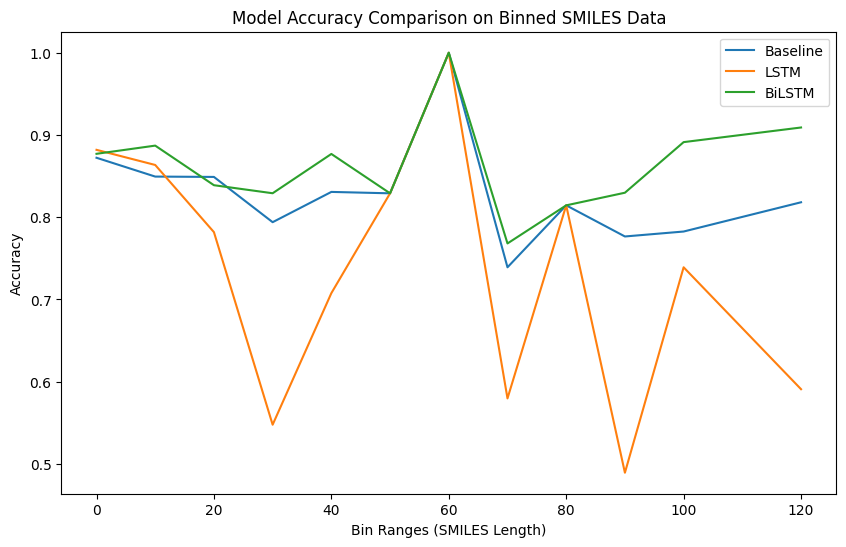

In [27]:
# نمودار مقایسه دقت مدل‌ها بر حسب بین‌ها
plt.figure(figsize=(10, 6))
plotx = [0,10,20,30,40,50,60,70,80,90,100,120]

for model_name, acc in accuracies.items():
    plt.plot(plotx, acc, label=model_name)

plt.title('Model Accuracy Comparison on Binned SMILES Data')
plt.xlabel('Bin Ranges (SMILES Length)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()